# 과제 1: 커널 비교 실험  
유방암(Breast Cancer) 데이터를 사용해 SVM의 커널 종류를 바꿔가며 결과를 시각화하기  
데이터: sklearn.datasets.load_breast_cancer()  

커널 종류 실험:  
- linear (선형 커널)  
- poly (다항 커널)  
- rbf (가우시안 커널)

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import accuracy_score
import numpy as np

In [79]:
X, y = load_breast_cancer().data, load_breast_cancer().target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

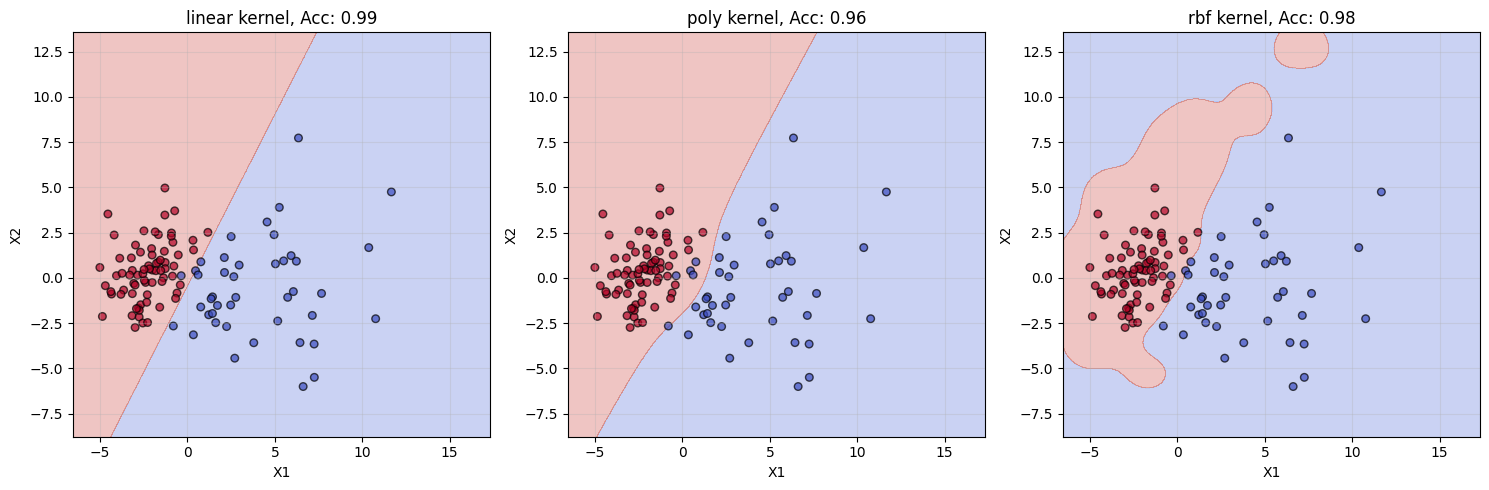

In [99]:
kernels = ['linear', 'poly', 'rbf']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, kernel in enumerate(kernels):
    ax = axes[idx]
    
    clf_svm = svm.SVC(kernel=kernel, gamma='auto')
    clf_svm.fit(X_train, y_train)
    y_pred = clf_svm.predict(X_test)

    # 메쉬 그리드 생성을 위한 범위 설정
    h = .02  # 메쉬 간격
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    
    # 메쉬 그리드 생성
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # 각 메쉬 포인트에서 예측
    Z = clf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    
    # 데이터 포인트
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test ,cmap='coolwarm', s=30, ec='k', alpha=0.7)

    ax.set_title(f'{kernel} kernel, Acc: {clf_svm.score(X_test, y_test):.2f}')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
# 과제 2: 하이퍼파라미터 조정 실험
rbf 커널을 기준으로 C와 gamma 값을 조정하며 모델의 변화를 관찰하기  
- C 값 실험: 0.1, 1, 10  
- gamma 값 실험: 0.001, 0.01, 0.1, 1  
- 각 조합별 결정 경계 시각화

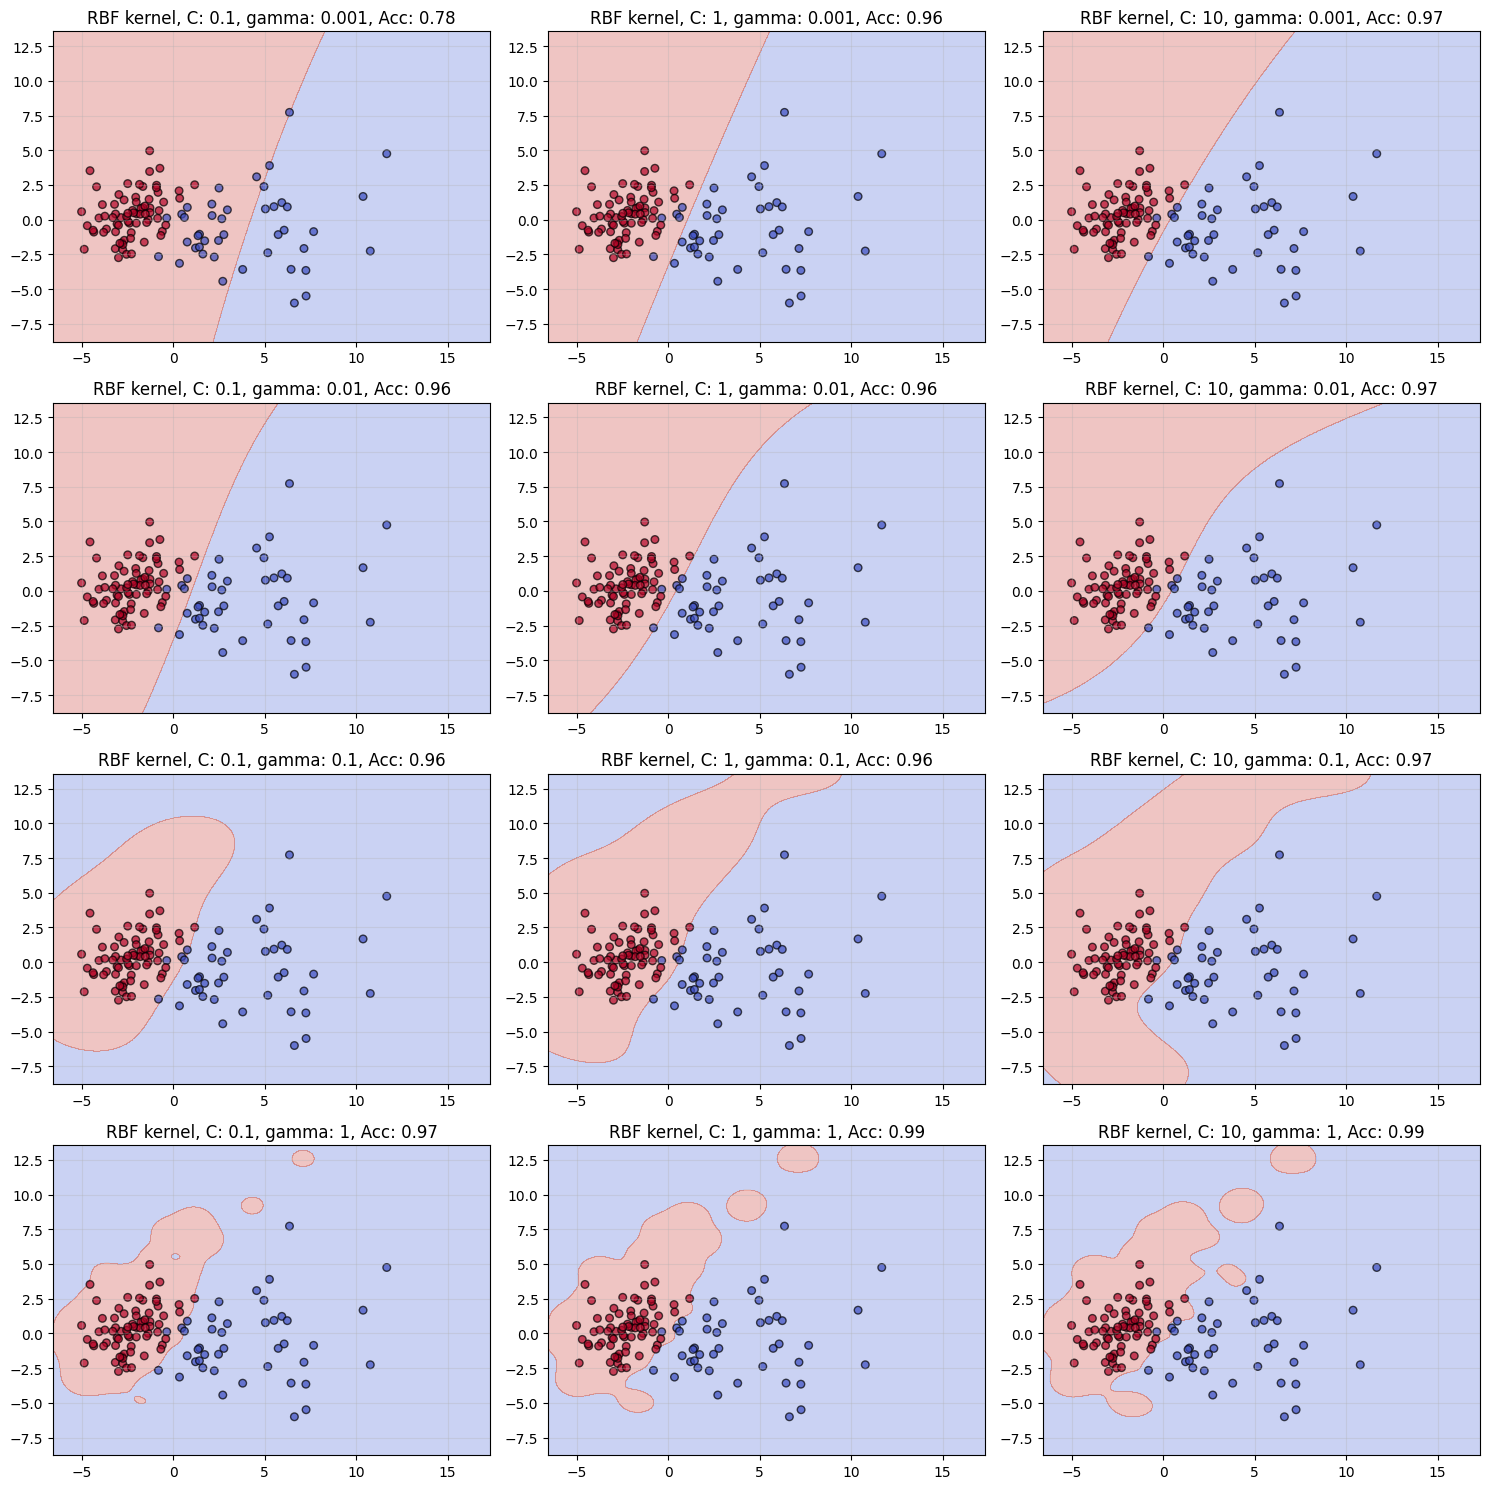

In [98]:
c_values = [0.1, 1, 10]
gamma_values = [0.001, 0.01, 0.1, 1]

fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for gamma in gamma_values:
    for c in c_values:
        ax = axs[gamma_values.index(gamma), c_values.index(c)]
        
        clf_svm = svm.SVC(kernel='rbf', gamma=gamma, C=c)
        clf_svm.fit(X_train, y_train)
        y_pred = clf_svm.predict(X_test)

        # 메쉬 그리드 생성을 위한 범위 설정
        h = .02  # 메쉬 간격
        x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
        y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    
        # 메쉬 그리드 생성
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
        # 각 메쉬 포인트에서 예측
        Z = clf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test ,cmap='coolwarm', s=30, ec='k', alpha=0.7)
        ax.set_title(f'RBF kernel, C: {c}, gamma: {gamma}, Acc: {clf_svm.score(X_test, y_test):.2f}')
        ax.grid(True, alpha=0.3)

        plt.tight_layout()